In [ ]:
!python --version

In [ ]:
import sys
sys.version

In [ ]:
!pip show pip

In [ ]:
import sys

if sys.version_info.major >= 3 and sys.version_info.minor >=10 and sys.version_info.micro >=0:
  print("correct python version")
else:
  print("please use python version 3.10.11 for kaggle and above colab")

## importing book

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib
  import matplotlib.pyplot as plt

In [ ]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

In [ ]:
pip show requests

In [ ]:
def download_book_from_web(url):
    import requests

    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Set encoding

        # Check if the request was successful
        if response.status_code == 200:
            text = response.text  # Store the text in a variable

            # Save to file (optional)
            with open('book.txt', 'w', encoding='utf-8') as f:
                print('Book downloaded successfully!')
                f.write(text)

            return text  # Return the variable for further use
        else:
            print(f"Failed to fetch book text. Status code: {response.status_code}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error downloading book: {e}")
        return None
url = 'https://www.gutenberg.org/files/244/244-0.txt'
text=download_book_from_web(url)

In [ ]:
text[:1000]

In [ ]:
text[-1000:-1]

In [ ]:
# Extract Title and Author from metadata
import re
mo_title = re.search(r"Title: ([^\r\n]+)", text)
mo_author = re.search(r"Author: ([^\r\n]+)", text)

if mo_title and mo_author:
    Title = mo_title.group(1).strip()  # "A Study In Scarlet"
    Author = mo_author.group(1).strip()  # "Arthur Conan Doyle"
    print(f"Title: {title}")
    print(f"Author: {author}")
else:
    print("Metadata not found.")

In [ ]:
Title

In [ ]:
Author

# stripping content

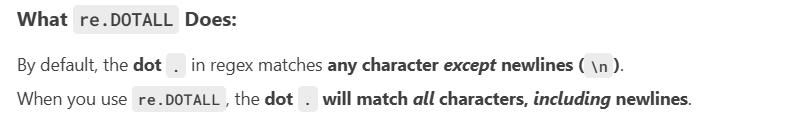

In [ ]:
import re

def remove_gutenberg_header_footer(text):
    """
    Removes the Project Gutenberg header and footer from the text.
    Returns the cleaned content.
    """
    # Header pattern (already compiled with re.DOTALL)
    header_pattern = re.compile(
        r'^.*?\*\*\* START OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Footer pattern (already compiled with re.DOTALL)
    footer_pattern = re.compile(
        r'\*\*\* END OF THE PROJECT GUTENBERG EBOOK .*?\*\*\*.*$',
        re.DOTALL  # DOTALL applied HERE during compilation
    )
    
    # Remove header (NO flags needed, pattern is pre-compiled)
    text = header_pattern.sub('', text)
    
    # Remove footer (NO flags needed, pattern is pre-compiled)
    text = footer_pattern.sub('', text)
    
    return text.strip()

In [ ]:

header_footer_removed = remove_gutenberg_header_footer(text)
print("header_footer_removed")

In [ ]:
header_footer_removed[-1000:-1]

In [ ]:
header_footer_removed[:1000]

In [ ]:
import re

def remove_table_of_contents(text):
    """
    Removes the table of contents from the text, keeping only the actual content
    starting from the second occurrence of "PART I."
    
    Args:
        text (str): The full text containing table of contents and main content
        
    Returns:
        str: The text with table of contents removed
    """
    # Split the text at each "PART I." occurrence
    parts = header_footer_removed.split("PART I.")
    
    # If we found at least two occurrences (table of contents + actual content)
    if len(parts) >= 2:
        # Keep everything from the second "PART I." onward
        return "PART I." + parts[2]
    else:
        # If no table of contents found, return original text
        return header_footer_removed

# Example usage:

remove_table_of_contents = remove_table_of_contents(text)
print(remove_table_of_contents[:1000])

In [ ]:
remove_table_of_contents[:1000]

In [ ]:
import re

def remove_table_of_contents(text):
    """
    Removes:
    1. The table of contents (everything before the actual content)
    2. The specific PART I introduction text
    Keeps only the chapter content starting from "CHAPTER I."
    """
    # First remove table of contents by finding the actual content start
    parts = header_footer_removed.split("PART I.")
    if len(parts) >= 2:
        content = "PART I." + parts[2]
    else:
        content = header_footer_removed
    
    # Now remove the specific PART I introduction
    # Split at the first CHAPTER occurrence after PART I
    chapters = re.split(r'CHAPTER [I]+\.', content, maxsplit=1)
    
    if len(chapters) > 1:
        # Keep everything from first chapter onward
        return "CHAPTER I." + chapters[1]
    return content

# Example usage:

remove_table_of_contents = remove_table_of_contents(header_footer_removed)
print(remove_table_of_contents[:100])

In [ ]:
remove_table_of_contents[:300]

In [ ]:
import re

def remove_chapter_heading(text):
    """Remove chapter headings in the format:
    'CHAPTER I.\r\nMR. SHERLOCK HOLMES.\r\n\r\n\r\n...'
    """
    pattern = r"^'?CHAPTER [A-Z]+\.?\r?\n.*\r?\n\r?\n\r?\n"
    return re.sub(pattern, "", text, flags=re.MULTILINE)

# Example usage:
original_text = remove_table_of_contents
cleaned_text = remove_chapter_heading(original_text)
print(cleaned_text[-600:-1])

In [ ]:
import re


def clean_text_for_booknlp(text):
    """
    Standardizes quotes and dashes while preserving foreign text (Unicode).
    """
    # Replace curly quotes with straight quotes (keeps meaning intact)
    text = re.sub(r'[“”]', '"', text)  # Double quotes
    text = re.sub(r'[‘’]', "'", text)   # Single quotes
    
    # Standardize dashes (em/en to hyphen or space-hyphen-space)
    text = re.sub(r'—', ' - ', text)  # em-dash → hyphen with spaces
    text = re.sub(r'–', '-', text)     # en-dash → hyphen
    
    # Keep all Unicode (including Latin, accents, etc.)
    return text







In [ ]:
clean_text_for_booknlp = clean_text_for_booknlp(cleaned_text)
clean_text_for_booknlp[:1000]

In [ ]:
clean_text_for_booknlp[-1000:-1]

## stripping content of book between start and end
### means removing header footer metadata

## stripping only_text_book

## removing chapters and titles 

## finalizing cleaned_text

In [ ]:
with open('/kaggle/working/clean_text_for_booknlp.txt',mode="w",encoding="utf-8")as f:
    f.write(clean_text_for_booknlp)

In [ ]:
# Save cleaned text
with open('/kaggle/working/clean_text_for_booknlp.txt', "r", encoding="utf-8") as f:
    text=f.read()

# if want to load

In [ ]:
# Save cleaned text
with open("/kaggle/input/interactive-literarycharacters-ai/book1.txt", "r", encoding="utf-8") as f:
 cleaned_text=f.read()

In [ ]:
cleaned_text[:2000]

## minor fixes line break Normalize spaces

In [ ]:
# import re

# def clean_text(text):
#     # Fix line-break artifacts
#     text = re.sub(r'\r\n', ' ', text)
   
#     # Normalize spaces
#     text = re.sub(r' +', ' ', text)
#     return text.strip()

In [ ]:
# cleaned_text=clean_text(cleaned_text)

In [ ]:
# with open ("/kaggle/input/interactive-literarycharacters-ai/book1.txt", "r") as f:
#     data = f.read()
# while "\n\n\n" in data:
#     data = data.replace("\n\n\n", "\n\n")
# data = data.replace("\'", "'")
# paragraphs = data.split("\n\n")
# final_ps = []
# for p in paragraphs:
#     p = p.replace("\n-", "").replace("\n", " ")
#     final_ps.append(p)
# final_data = "\n\n".join(final_ps)
# with open ("/kaggle/working/cleaned_data.txt","w") as f:
#     f.write(final_data)

## stopwords removal

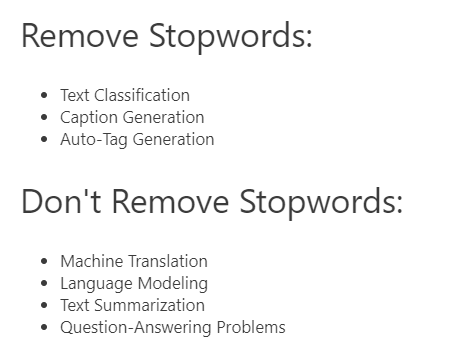

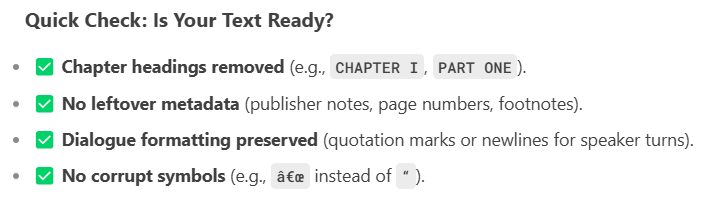

## lowering the text

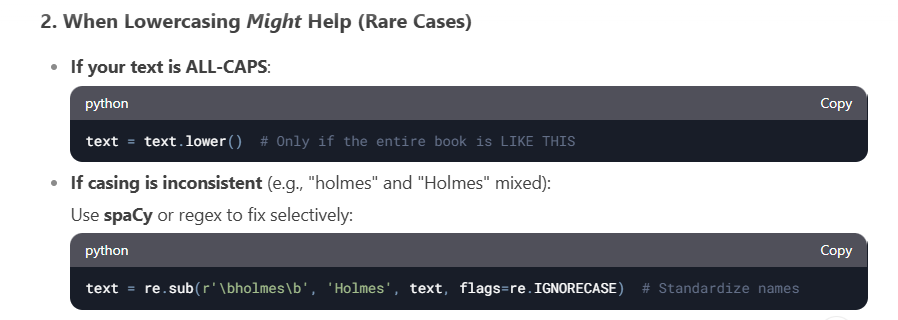

## wordcloud

In [ ]:
!pip install wordcloud

In [ ]:
pip show wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text_for_booknlp)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# performing booknlp

## nlp pipline used to process long txt like books

In [ ]:
#installing java
!apt-get update
!apt-get install -y openjdk-11-jdk
!update-alternatives --set java /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

# Verify Java installation
!java -version

In [ ]:
!javac -version

In [ ]:
!pwd

In [ ]:
# Install dependencies
!git clone https://github.com/booknlp/booknlp.git
%cd booknlp
#download all things that all listed in setup.py
#dowload all requriments in editable files and . represent present working directory
!pip install -e .


In [ ]:
# Install BookNLP and its dependencies

!pip install "booknlp==1.0.7"

In [ ]:
!pip show booknlp

In [ ]:
!pip show spacy

In [ ]:
!pwd

In [ ]:
import booknlp
print(booknlp.__file__)  # This gives the package location

## code error fixing for booknlp library

In [ ]:
import os
os.chdir("/kaggle/working/")

!wget https://github.com/mohdabuzaransari9/Interactive-literary-characters-ai/raw/main/files_update_for_booknlp_library.zip

In [ ]:
#verify file
!file files_update_for_booknlp_library.zip

In [ ]:
#unzip
from zipfile import ZipFile
zip_ref=ZipFile(r"/kaggle/working/files_update_for_booknlp_library.zip")
zip_ref.extractall()
zip_ref.close()


In [ ]:
import os


for root, dirs, files in os.walk("/kaggle/working/files_update_for_booknlp_library/"):
  for dir_name in dirs:
    print(os.path.join(root, dir_name))
  for file_name in files:
    print(os.path.join(root, file_name))


In [ ]:
import pathlib# p is small

data_dir=pathlib.Path("/kaggle/working/files_update_for_booknlp_library/")

file_names=[class_names.name for class_names in data_dir.glob('*')]
file_names

In [ ]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/litbank_coref.py",
    "/kaggle/working/files_update_for_booknlp_library/bert_qa.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_tagger.py",
    "/kaggle/working/files_update_for_booknlp_library/entity_cat.tagset",
    
]

destination = "/kaggle/working/booknlp/booknlp/english"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

In [ ]:
import shutil
import os

# Define the source files
source_files = [
    "/kaggle/working/files_update_for_booknlp_library/booknlp.py"
]

destination = "/kaggle/working/booknlp/booknlp/"  #  path

os.makedirs(destination, exist_ok=True)

# Copy each file to the destination directory (overriding if they exist)
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination)
        print(f"updating library files {file_path} to {destination}")
    else:
        print(f"File not found: {file_path}")

In [ ]:
!pwd

In [ ]:
!ls /kaggle/working

## If characters isn’t tagged as a character, we may need to tweak the NER model.

In [ ]:
import os
from IPython.display import FileLink

import os
os.chdir("/kaggle/working")
# Generate a download link
FileLink("clean_text_for_booknlp.txt")

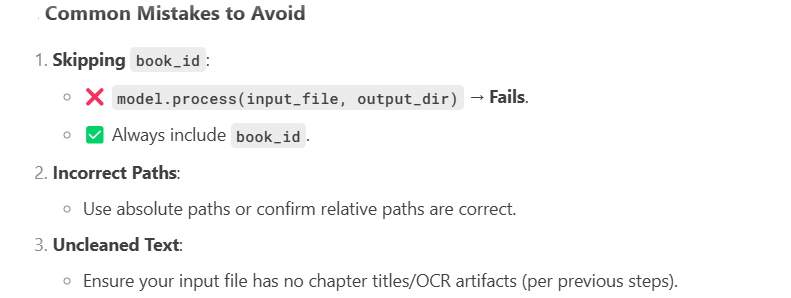

## running full pipeline 🤗

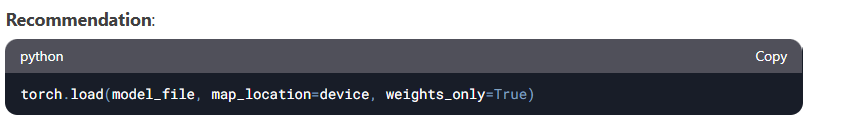

In [ ]:
# importing booknlp class
from booknlp.booknlp import BookNLP

In [ ]:
book_id_value="a_study_in_scarlet"

In [ ]:
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
        "book_id" : book_id_value
	}


In [ ]:
!pwd

In [ ]:
booknlp=BookNLP("en",model_params)

In [ ]:
# Input and output paths
input_file = "/kaggle/working/clean_text_for_booknlp.txt"  # Adjust the path if your file is in a different directory
output_dir = "/kaggle/working/booknlp_output"  # Output will be saved in the working directory
book_id = book_id_value  # Use underscores or avoid spaces for compatibility

# Ensure the output directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your processing code here (e.g., running BookNLP or other text processing)
# Example: Print the input file path and output directory for verification
print(f"Input file: {input_file}")
print(f"Output directory: {output_dir}")
print(f"Book ID: {book_id}")

# this will take long time approx 10-15 min

In [ ]:
%%time
# Process the book
booknlp.process(input_file, output_dir,book_id)

In [ ]:
# List output files
import os
print(os.listdir(output_dir))

## The output from the BookNLP pipeline is three types of files:


1.   TSV files (.tokens, .entities, .quotes, .supersense),
2.   JSON file (.book)
3.   HTML file (.book.html)

## **download the output files**

In [ ]:
from IPython.display import FileLink
FileLink('booknlp_output/a_study_in_scarlet.tokens')

## **creating dataframe**

In [ ]:
df_tokens = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.tokens', delimiter="\t",)
df_tokens

In [ ]:
df_entities = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.entities", delimiter="\t")
df_entities

In [ ]:
df_quotes = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.quotes", delimiter="\t")
df_quotes

In [ ]:
df_supersense = pd.read_csv('/kaggle/working/booknlp_output/a_study_in_scarlet.supersense', delimiter="\t")
df_supersense

##  large JSON file that contains information structured around the characters

In [ ]:
import json

with open ("/kaggle/working/booknlp_output/a_study_in_scarlet.book", "r") as f:
    book_data = json.load(f)
book_data.keys()

## For each character, we have a dictionary with 8 keys

In [ ]:
len(book_data["characters"])

In [ ]:
book_data["characters"][5].keys()

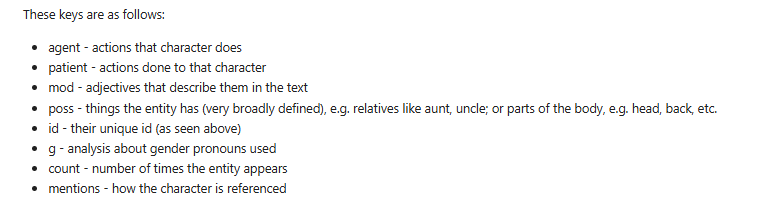

In [ ]:
book_data["characters"][5]["agent"][:1]
book_data["characters"][5]["patient"][:1]
book_data["characters"][5]["mod"][:1]
book_data["characters"][5]["poss"][:1]
book_data["characters"][5]["id"]
book_data["characters"][5]["g"]
book_data["characters"][5]["count"]
book_data["characters"][5]["mentions"].keys()

In [ ]:
book_data["characters"][5]["agent"][:10]

In [ ]:
book_data["characters"][5]["mod"][:10]

In [ ]:
book_data["characters"][5]["poss"][:10]

In [ ]:

book_data["characters"][5]["id"]

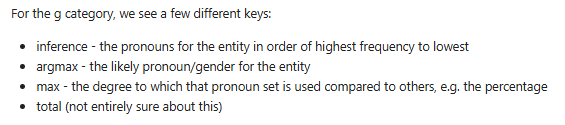

In [ ]:
book_data["characters"][5]["g"]

In [ ]:
book_data["characters"][5]["count"]

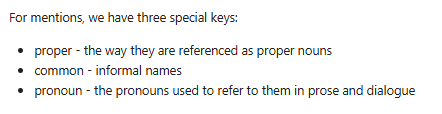

In [ ]:
book_data["characters"][5]["mentions"].keys()

In [ ]:
book_data["characters"][5]["mentions"]["proper"]

In [ ]:
book_data["characters"][5]["mentions"]["common"]

In [ ]:
book_data["characters"][5]["mentions"]["pronoun"]

## Character Analysis

 load up the JSON data from the .book file and count the occurrences of certain things found within the .book file.

In [ ]:
import json
from collections import Counter

In [ ]:
#loads and parses the JSON file for us using the JSON library
def proc(filename):
    with open(filename) as file:
        data=json.load(file)
    return data

In [ ]:
def get_counter_from_dependency_list(dep_list):
    counter=Counter()
    for token in dep_list:
        term=token["w"]
        tokenGlobalIndex=token["i"]
        counter[term]+=1
    return counter

In [ ]:
data=proc("/kaggle/working/booknlp_output/a_study_in_scarlet.book")

 # create some character_data



In [ ]:
def create_character_data(data, printTop):
    character_data = {}
    for character in data["characters"]:

        agentList=character["agent"]
        patientList=character["patient"]
        possList=character["poss"]
        modList=character["mod"]

        character_id=character["id"]
        count=character["count"]

        referential_gender_distribution=referential_gender_prediction="unknown"

        if character["g"] is not None and character["g"] != "unknown":
            referential_gender_distribution=character["g"]["inference"]
            referential_gender=character["g"]["argmax"]

        mentions=character["mentions"]
        proper_mentions=mentions["proper"]
        max_proper_mention=""
        
        #Let's create some empty lists that we can append to.
        poss_items = []
        agent_items = []
        patient_items = []
        mod_items = []
    
        # just print out information about named characters
        if len(mentions["proper"]) > 0:
            max_proper_mention=mentions["proper"][0]["n"]
            for k, v in get_counter_from_dependency_list(possList).most_common(printTop):
                poss_items.append((v,k))
                
            for k, v in get_counter_from_dependency_list(agentList).most_common(printTop):
                agent_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(patientList).most_common(printTop):
                patient_items.append((v,k))     

            for k, v in get_counter_from_dependency_list(modList).most_common(printTop):
                mod_items.append((v,k))  

            
            
            
            # print(character_id, count, max_proper_mention, referential_gender)
            character_data[character_id] = {"id": character_id,
                                  "count": count,
                                  "max_proper_mention": max_proper_mention,
                                  "referential_gender": referential_gender,
                                  "possList": poss_items,
                                  "agentList": agent_items,
                                  "patientList": patient_items,
                                  "modList": mod_items
                                 }
                                
    return character_data


1.  thee data that we created above, i.e. the original .book JSON data
2.  printTop which will be the number of items you seek to return about the character

### create some character_data now that will retain the top 10 items connected to each character. If you want to see all possible things connected to the character, simply set this item to a very high number, e.g. 20000

In [ ]:

character_data = create_character_data(data, 10)

In [ ]:
print (character_data[143])

## main gender, verbs, possession items, etc. connected to someone

##  agent and patient. Within each will be the verbs used in the text. These will be matched to a list of the characters connected to those verbs.

In [ ]:
def find_verb_usage(data, analysis=["agent", "patient"]):
    new_analysis = []
    for item in analysis:
        if item == "agent":
            new_analysis.append("agentList")
        elif item == "patient":
            new_analysis.append("patientList")
    main_agents = {}
    main_patients = {}
    for character in character_data:
        temp_data = character_data[character]
        for item in new_analysis:
            for verb in temp_data[item]:
                verb = verb[1].lower()
                if item == "agentList":
                    if verb not in main_agents:
                        main_agents[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_agents[verb].append((character, temp_data["max_proper_mention"]))
                elif item == "patientList":
                    if verb not in main_patients:
                        main_patients[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_patients[verb].append((character, temp_data["max_proper_mention"]))
    verb_usage = {"agent": main_agents,
                 "patient": main_patients}
    return verb_usage

In [ ]:
verb_data = find_verb_usage(data)

In [ ]:
#  analyze the characters in a verb-centric manner
# was interested in what characters were the agents of the verb "wish".

verb_data["agent"]["took"]

** our verbs are not lemmatized **

In [ ]:
# If you want to see how verbs area used by all characters, 
# create a new character data file and make your top-n equal to a larger number.

## 5

In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/working/booknlp_output/a_study_in_scarlet.tokens", delimiter="\t")
df

In [ ]:
df = df[["sentence_ID", "word", "lemma", "event"]]
df

In [ ]:
# some event columns contain NaN. Ideally, we want to ignore these entirely. 
# We can do this in pandas by using the isnull() method.

In [ ]:
events = df[~df['event'].isnull()]
events

In [ ]:
print(df.columns)  # Verify 'event' exists

In [ ]:
# Check null values in 'event' column
print("Null values in 'event':", df['event'].isnull().sum())

# Filter non-null events
events = df[~df['event'].isnull()].copy()  # Using .copy() avoids SettingWithCopyWarning

# Check the filtered DataFrame
print("Shape of 'events':", events.shape)  # Should be (non_null_rows, 4)
print("First 5 rows of 'events':\n", events.head())

In [ ]:
event_options = set(events['event'].tolist())

In [ ]:
# event_options = set(events.event.tolist())
print (event_options)

In [ ]:
real_events = events.loc[df["event"] == "EVENT"]
real_events

In [ ]:
event_words = set(real_events["word"].tolist())
len(event_words)

In [ ]:
event_lemmas = list(set(real_events["lemma"].tolist()))
event_lemmas.sort()
len(event_lemmas)

In [ ]:
print (event_lemmas[:10])

In [ ]:
# some lemmas are capitalized. Let's eliminate all duplicates by lowering all lemmas.


In [ ]:
final_lemmas = []
for lemma in event_lemmas:
    lemma = lemma.lower()
    if lemma not in final_lemmas:
        final_lemmas.append(lemma)
        
print(len(final_lemmas))
print(final_lemmas[:10])

### grabbing event sentences

In [ ]:
sentences = real_events.sentence_ID.tolist()
events = real_events.word.tolist()
print (sentences[:10])
print (events[:10])

In [ ]:
#grab all rows that have a matching sentence_ID.
sentence1 = sentences[5]
result = df[df["sentence_ID"] == int(sentence)]
result

In [ ]:
# Get the specific sentence ID you want to match
sentence1 = sentences[5]  # Using a clearer variable name

# Filter the DataFrame for matching rows (with type conversion safety)
result = df[df["sentence_ID"].astype(int) == int(target_sentence_id)]

print(result) 

In [ ]:
#  grab all the words and reconstruct the sentence.

words = result.word.tolist()
resentence = " ".join(words)
print (resentence)

In [ ]:
#tokens file.
# It will find the relevant event rows and then reconstruct the sentences
# that correspond to each event word.
#The output will be a list of dictionaries that are event-centric
# Each dictionary will have 3 keys:

# event_word = the event-triggering word
# event_lemma = the event_word's lemma
# sentence = the sentence that the event-triggering word is in

In [ ]:
# creating event file
def grab_event_sentences(file):
    df = pd.read_csv(file, delimiter="\t")
    real_events = df.loc[df["event"] == "EVENT"]
    sentences = real_events.sentence_ID.tolist()
    event_words = real_events.word.tolist()
    event_lemmas = real_events.lemma.tolist()
    final_sentences = []
    x=0
    for sentence in sentences:
        result = df[df["sentence_ID"] == int(sentence)]
        words = result.word.tolist()
        resentence = " ".join(words)
        final_sentences.append({"event_word": event_words[x],
                                "event_lemma": event_lemmas[x],
                                "sentence": resentence
                                   
                               })
        x=x+1
    return final_sentences
    
    
event_data = grab_event_sentences("/kaggle/working/booknlp_output/a_study_in_scarlet.tokens")

In [ ]:
def grab_event_sentences(file):
    # Read the data and ensure word column is string type
    df = pd.read_csv(file, delimiter="\t")
    df['word'] = df['word'].astype(str)  # Convert all words to strings
    
    # Filter for EVENT rows
    real_events = df[df["event"] == "EVENT"].copy()
    
    # Initialize output list
    final_sentences = []
    
    # Process each event
    for _, event_row in real_events.iterrows():
        # Get all words in this sentence (convert to string again for safety)
        sentence_rows = df[df["sentence_ID"] == event_row["sentence_ID"]]
        words = sentence_rows["word"].astype(str).tolist()  # Force string conversion
        full_sentence = " ".join(words)
        
        # Add to results
        final_sentences.append({
            "event_word": str(event_row["word"]),  # Ensure string
            "event_lemma": str(event_row["lemma"]),  # Ensure string
            "sentence": full_sentence
        })
    
    return final_sentences

In [ ]:
event_data = grab_event_sentences("/kaggle/working/booknlp_output/a_study_in_scarlet.tokens")

In [ ]:
print (event_data[5])

In [ ]:
new_df = pd.DataFrame(event_data)
new_df

In [ ]:
new_df.to_csv("/kaggle/working/book2.events", index=False)

## **Zipping the output directory**

### !zip -r file_name.zip foldername

###   -r standsfor recursive


In [ ]:
# Zip the folder
!zip -r output.zip /kaggle/working/



In [ ]:
# Create download link
from IPython.display import FileLink
FileLink('output.zip')

## Huggingface

In [1]:
pip show transformers accelerate

Name: transformers
Version: 4.47.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: kaggle-environments, peft, sentence-transformers
---
Name: accelerate
Version: 1.2.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: peft
Note: you may need to restart the kernel to use

In [2]:
!pip install huggingface_hub

In [3]:

pip show huggingface_hub

Name: huggingface-hub
Version: 0.29.0
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, datasets, diffusers, peft, sentence-transformers, timm, tokenizers, torchtune, transformers
Note: you may need to restart the kernel to use updated packages.


In [4]:
import huggingface_hub
huggingface_hub.login()

In [5]:
# !pip install "datasets==3.3.1" #Downgrade to a compatible version previous i was trying 2.1.0
# import datasets

In [ ]:
# try:
#     import random
#     import torch
#     import evaluate
#     import accelerate
#     import transformers
#     import gradio as gr

# except ModuleNotFoundError:
#   !pip install "evaluate==0.4.3"
#   !pip install "accelerate==1.5.2"
#   !pip install "gradio==5.22.0"
#   !pip install "transformers==4.49.0"

# print(f'[INFO] torch version {torch.__version__}')

# print(f'[INFO] datasets version {datasets.__version__}')

In [6]:
pip show torch datasets evaluate accelerate transformers gradio

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, easyocr, fastai, kornia, peft, pytorch-ignite, pytorch-lightning, sentence-transformers, stable-baselines3, timm, torchaudio, torchmetrics, torchvision
---
Name: datasets
Version: 3.3.1
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: torchtune
---
Name: accelerate
Versi

In [7]:
pip show transformers

Name: transformers
Version: 4.47.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: kaggle-environments, peft, sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install "bitsandbytes==0.43.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.7 MB/s eta 0:00:00:00:0100:01


In [12]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer= AutoTokenizer.from_pretrained(pretrained_model_name_or_path="mistralai/Mistral-7B-Instruct-v0.1",
                                        use_fast=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-Instruct-v0.1', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [13]:
import torch
print(torch.version.cuda)  # Prints the CUDA version (e.g., '11.8')
print(torch.cuda.is_available())  # Should return True


12.1
True


In [14]:
import torch
from peft import LoraConfig, AutoPeftModelForCausalLM, prepare_model_for_kbit_training, get_peft_model
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments
import os

In [15]:
from transformers import BitsAndBytesConfig

In [16]:
# Load a 4-bit quantized model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,    # Enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16,  # Use fp16 for computation
    bnb_4bit_use_double_quant=True,  # Use double quantization for memory efficiency
)

In [19]:

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    quantization_config=quantization_config,
    device_map="auto"  # Automatically assigns layers to available GPUs
)

ImportError: Using `bitsandbytes` 4-bit quantization requires the latest version of bitsandbytes: `pip install -U bitsandbytes`

In [18]:
print(model)

NameError: name 'model' is not defined

In [20]:
!pip list

Package                            Version              Editable project location
---------------------------------- -------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiofiles                           22.1.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
aiosqlite                          0.21.0
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
alembic                            1.14.1
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
args                               0.1.0
array_

## how to download kaggle output input directory files

In [ ]:
# from IPython.display import FileLink
# FileLink('/kaggle/working/cleaned_txt.txt')

## kaggle how to delete a working directory file¶

In [ ]:
# import os

# # Delete a single file
# os.remove("/kaggle/working/cleaned_text.txt")  # Replace with your filename

#  Check if file exists before deleting (optional)
# if os.path.exists("/kaggle/working/cleaned_text.txt"):
#     os.remove("/kaggle/working/cleaned_text.txt")
# else:
#     print("File does not exist.")

## deleting a folder

In [ ]:
# # removing a directory
# import shutil

# # Delete an entire directory and its contents
# shutil.rmtree("/kaggle/working/booknlp_output")  # Use with caution!

In [ ]:
!zip -r output.zip '/kaggle/working'
from IPython.display import FileLink
FileLink('/kaggle/working/output.zip')

In [ ]:
# #HF_Token access

# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()
# HF_TOKEN = user_secrets.get_secret("HF_TOKEN")
